In [ ]:
# Double Pendulum Chaos Simulation
# **Computational Physics Portfolio Project**

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib inline

In [2]:
# Parameters
g = 9.81
l1 = 1.0
l2 = 1.0
m1 = 1.0
m2 = 1.0

def deriv(y, t, g, l1, l2, m1, m2):
    theta1, omega1, theta2, omega2 = y
    
    dtheta1 = omega1
    dtheta2 = omega2
    
    # Standard double-pendulum equations (from classical mechanics, see accompanying math workup.)
    domega1 = (-g * (2 * m1 + m2) * np.sin(theta1) 
               - m2 * g * np.sin(theta1 - 2*theta2) 
               - 2 * np.sin(theta1 - theta2) * m2 
               * (omega2**2 * l2 + omega1**2 * l1 * np.cos(theta1 - theta2))) \
              / (l1 * (2 * m1 + m2 - m2 * np.cos(2 * (theta1 - theta2))))
    
    domega2 = (2 * np.sin(theta1 - theta2) 
               * (omega1**2 * l1 * (m1 + m2) 
               + g * (m1 + m2) * np.cos(theta1) 
               + omega2**2 * l2 * m2 * np.cos(theta1 - theta2))) \
              / (l2 * (2 * m1 + m2 - m2 * np.cos(2 * (theta1 - theta2))))
    
    return [dtheta1, domega1, dtheta2, domega2]

In [3]:
# Initial angles (radians) – produces nice chaotic motion
y0 = [np.pi/2, 0, np.pi/3, 0]   # upper at 90°, lower at 60°

t = np.linspace(0, 30, 1500)   # 30 seconds, smooth animation

sol = odeint(deriv, y0, t, args=(g, l1, l2, m1, m2))

theta1 = sol[:, 0]
theta2 = sol[:, 2]
print("✅ Simulation complete!")

✅ Simulation complete!


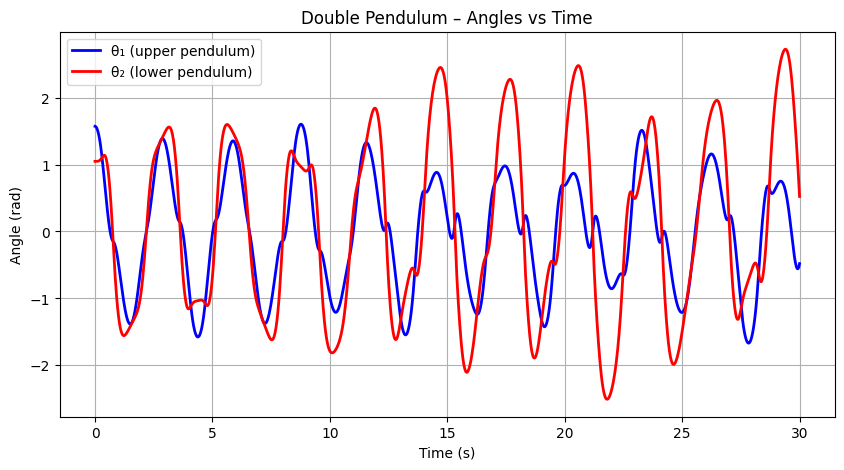

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(t, theta1, label='θ₁ (upper pendulum)', color='blue', lw=2)
plt.plot(t, theta2, label='θ₂ (lower pendulum)', color='red', lw=2)
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.title('Double Pendulum – Angles vs Time')
plt.legend()
plt.grid(True)
plt.show()

(np.float64(-2.2), np.float64(2.2), np.float64(-2.2), np.float64(2.2))

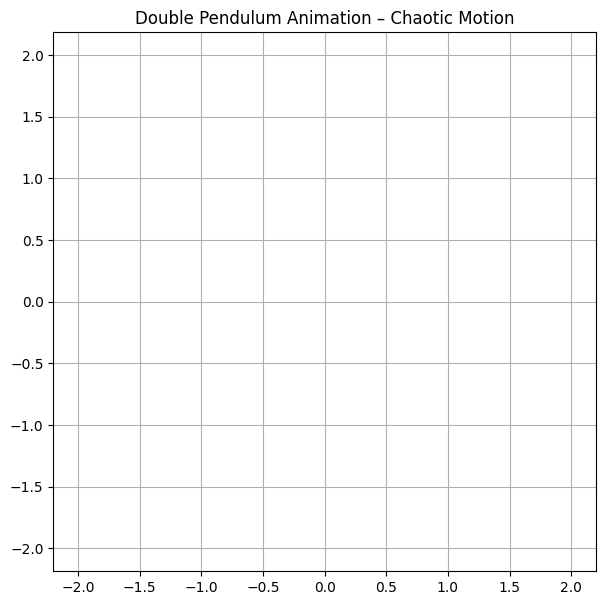

In [5]:
def get_positions(theta1, theta2):
    x1 = l1 * np.sin(theta1)
    y1 = -l1 * np.cos(theta1)
    x2 = x1 + l2 * np.sin(theta2)
    y2 = y1 - l2 * np.cos(theta2)
    return x1, y1, x2, y2

fig = plt.figure(figsize=(7, 7), dpi=100)
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2.2, 2.2), ylim=(-2.2, 2.2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=3, color='#1f77b4', markersize=8)  # rods + bobs
trace, = ax.plot([], [], '.-', lw=1.5, color='gray', alpha=0.6, markersize=3)  # path of lower bob

time_text = ax.text(0.05, 0.92, '', transform=ax.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.8))

history_x = []
history_y = []

def init():
    line.set_data([], [])
    trace.set_data([], [])
    time_text.set_text('')
    return line, trace, time_text

def animate(i):
    x1, y1, x2, y2 = get_positions(theta1[i], theta2[i])
    thisx = [0, x1, x2]
    thisy = [0, y1, y2]
    line.set_data(thisx, thisy)
    
    history_x.append(x2)
    history_y.append(y2)
    trace.set_data(history_x, history_y)
    
    time_text.set_text(f'Time = {t[i]:.1f} s')
    return line, trace, time_text

ani = FuncAnimation(fig, animate, init_func=init, frames=len(t), interval=20, blit=True)

plt.title('Double Pendulum Animation – Chaotic Motion')
plt.axis('equal')
plt.show()

In [6]:
ani.save('double_pendulum.gif', writer='pillow', fps=30)
print("✅ GIF saved as double_pendulum.gif !")

✅ GIF saved as double_pendulum.gif !


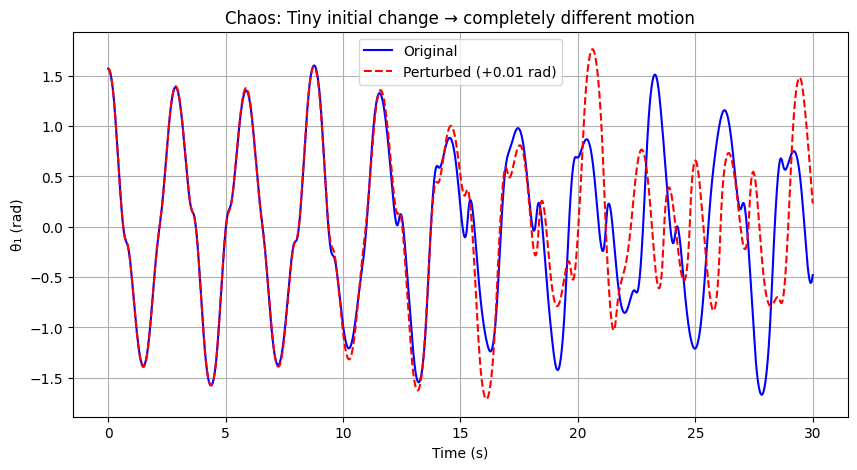

In [7]:
y0_pert = [np.pi/2, 0, np.pi/3 + 0.01, 0]  # only 0.57° difference

sol2 = odeint(deriv, y0_pert, t, args=(g, l1, l2, m1, m2))

plt.figure(figsize=(10, 5))
plt.plot(t, theta1, label='Original', color='blue')
plt.plot(t, sol2[:,0], label='Perturbed (+0.01 rad)', color='red', ls='--')
plt.xlabel('Time (s)')
plt.ylabel('θ₁ (rad)')
plt.title('Chaos: Tiny initial change → completely different motion')
plt.legend()
plt.grid(True)
plt.show()